# Import the dataset

In [1]:
#import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from numpy import savetxt
import pickle
from random import shuffle
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

/home/charun/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from tqdm import tqdm


In [3]:
#import the dataset using the pandas

df_train = pd.read_excel('/home/charun/Documents/Projects/text_research/train_dataset.xlsx')

df_train.columns

Index(['Text', 'Label'], dtype='object')

In [4]:
df_train.Label.value_counts()

Integration          976
Debug                952
User Interface       937
Core                 925
Document and text    888
label                  1
Name: Label, dtype: int64

In [5]:
num_of_categories = 888
shuffled = df_train.reindex(np.random.permutation(df_train.index))

Debug = shuffled[shuffled['Label'] == 'Debug'][:num_of_categories]
User_interface  = shuffled[shuffled['Label'] == 'User Interface'][:num_of_categories]
Integration = shuffled[shuffled['Label'] == 'Integration'][:num_of_categories]
Core = shuffled[shuffled['Label'] == 'Core'][:num_of_categories]
Document_and_text = shuffled[shuffled['Label'] == 'Document and text'][:num_of_categories]

concated = pd.concat([Debug,User_interface,Integration,Core,Document_and_text], ignore_index=True)
#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
concated['LABEL'] = 0

In [7]:
concated.head(5)

,Text,Label,LABEL
3835,[Undo] - Splitting up of text commands after i...,Document and text,0
707,OutputStreamMonitor #read method is inefficient,Debug,0
3644,Refactoring logs exception from JavaReconciler,Document and text,0
988,pde.exportPlugins ant task doesn't support cycles,User Interface,0
4056,[implementation][api] Sleeping scheduled synch...,Document and text,0


In [6]:
#One-hot encode the lab
concated.loc[concated['Label'] == 'Debug', 'LABEL'] = 0
concated.loc[concated['Label'] == 'User Interface', 'LABEL'] = 1
concated.loc[concated['Label'] == 'Integration', 'LABEL'] = 2
concated.loc[concated['Label'] == 'Core', 'LABEL'] = 3
concated.loc[concated['Label'] == 'Document and text', 'LABEL'] = 4
print(concated['LABEL'][:10])
labels = to_categorical(concated['LABEL'], num_classes=5)
print(labels[:10])
if 'Label' in concated.keys():
    concated.drop(['Label'], axis=1)
    
      

3944    4
191     0
2329    2
1279    1
2978    3
1854    2
4357    4
3617    4
2004    2
1847    2
Name: LABEL, dtype: int64
[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [7]:
concated['Text'] = concated['Text'].str.replace('\d+', ' ')
concated['Text'] = concated['Text'].apply(str)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [8]:
# preprocess our evaluation dataset
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from numpy import savetxt
import pickle

def form_sentence(tweet):
    tweet = re.sub(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", '', tweet)
    tweet = re.sub(r'<[^>]+>', '', tweet)
    tweet = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', tweet)
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)


def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess


def normalization(tweet_list):
    lem = WordNetLemmatizer()
    normalized_tweet = []
    for word in tweet_list:
        normalized_text = lem.lemmatize(word, 'v')
        normalized_tweet.append(normalized_text)
    return normalized_tweet


Final_words_train = [] 



for data in concated['Text']:
    filtered = normalization(no_user_alpha(form_sentence(data)))
    word_Final = ' '.join(filtered)
    Final_words_train.append(word_Final)
    


# store preprocessed data to new dataframe called final_bodyTrain    
    
final_body_train = pd.DataFrame(Final_words_train, columns=['text'])

ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of ticklabels (3400).

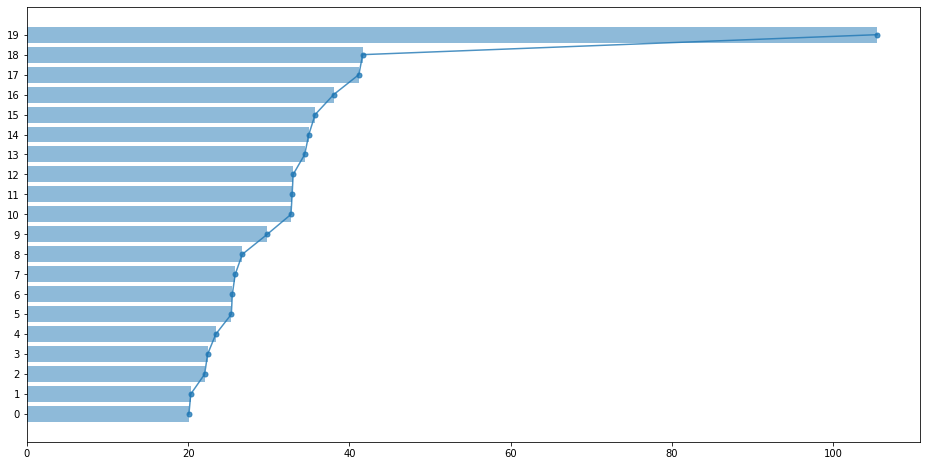

In [31]:
from sklearn.feature_selection import chi2
tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(concated['Text'])
y = concated.LABEL
chi2score = chi2(X_tfidf, y)[0]


plt.figure(figsize=(16,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels_ = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('value')
plt.show();

In [20]:
feature_set = []

for i in range(0, len(chi2)):
    if chi2[i][1] < 0.25:
        feature_set.append(chi2[i][0])
    

In [21]:
# then we remove the words of the feature_list from our original dataset. we replace those words with a space.
# so the words with less than 0.5 score are removed from the dataset
for data in concated['Text']:
    for feature in feature_set:
        if feature in data:
            concated['Text'] = concated['Text'].replace(feature, ' ')

In [9]:
token = Tokenizer()
token.fit_on_texts(final_body_train['text'])

#integer encode the documents
seq = token.texts_to_sequences(final_body_train['text'])

# pad the document

max_length = 100
pad_seq = pad_sequences(seq, maxlen=max_length, padding='post')

#test set

#test_data = token.texts_to_sequences(final_bodyTest['body'])
#testing_seq = pad_sequences(test_data, maxlen = max_length, padding= 'post')


vocab_size = len(token.word_index) +1

#load the embedding layer

embedding_vector = {}

f = open('/home/charun/Documents/Projects/text_research/glove.6B/glove.6B.100d.txt')
 
for line in tqdm(f):
  value = line.split(' ')
  word = value[0]
  coef = np.array(value[1:], dtype = 'float32')
  embedding_vector[word] = coef


# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word,i in tqdm(token.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value


400000it [00:17, 23400.60it/s]
100%|██████████| 3391/3391 [00:00<00:00, 357170.46it/s]


In [69]:
n_most_common_words = 8000
max_len = 130
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(concated['Text'].values)
sequences = tokenizer.texts_to_sequences(concated['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 4671 unique tokens.


In [11]:
# split the dataset in to train and test data
X_train, X_test, y_train, y_test = train_test_split(pad_seq , labels, test_size=0.3, random_state=42)

In [12]:
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,roc_auc_score,roc_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Dropout
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
callback = EarlyStopping(monitor='val_loss')
#define the model

model = Sequential()
model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], input_length=max_length, trainable=False))
model.add(Bidirectional(LSTM(100, dropout=0.5)))
model.add(Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(5,activation = 'softmax'))

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    #metrics = [tf.keras.metrics.Accuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
               tf.keras.metrics.Precision(name='precision'),
               tf.keras.metrics.Recall(name='recall')]
)

#path = '/content/drive/My Drive/Covid-19 research/patients_data/logs/fit/'
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)

history = model.fit(
    X_train, y_train, 
    batch_size = 128,
    epochs = 250,
    validation_split = 0.30,
    
    callbacks = [callback]
)



model.save(f'/home/charun/Documents/Projects/text_research/testing_model.h5')

Epoch 1/250
17/17 [==============================] - 9s 323ms/step - loss: 1.7643 - accuracy: 0.8000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.7320 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/250
17/17 [==============================] - 5s 276ms/step - loss: 1.7208 - accuracy: 0.8000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.6919 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/250
17/17 [==============================] - 5s 274ms/step - loss: 1.6889 - accuracy: 0.8001 - precision: 0.3889 - recall: 2.8592e-04 - val_loss: 1.6513 - val_accuracy: 0.8000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/250
17/17 [==============================] - 5s 268ms/step - loss: 1.6401 - accuracy: 0.8012 - precision: 0.9352 - recall: 0.0060 - val_loss: 1.6086 - val_accuracy: 0.8002 - val_precision: 1.0000 - val_recall: 0.0011
Epoch 5/250
17/17 [==============================] - 5s 

In [13]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics = [tf.keras.metrics.BinaryAccuracy('accuracy'), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
print(model.summary())
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

model.save('/home/charun/Documents/Projects/text_research/model.h5')

((2380, 130), (2380, 5), (1020, 130), (1020, 5))
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 130, 128)          1024000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 130, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 1,073,733
Trainable params: 1,073,733
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
15/15 [==============================] - 6s 260ms/step - loss: 1.6094 - accuracy: 0.8000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 1.6057 - val_accuracy: 0.80

In [26]:
import tensorflow

model = tf.keras.models.load_model('/home/charun/Documents/Projects/text_research/testing_model.h5')

In [27]:
max_len = 100
txt = ["Compile warning in official build"]
seq = token.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['Debug', 'User Interface', 'Integration', 'Core', 'Document and text']
print(pred, labels[np.argmax(pred)])

[[0.2698176  0.18354066 0.17970876 0.17237405 0.19455895]] Debug


In [28]:
df_eval = pd.read_excel('/home/charun/Documents/Projects/text_research/eval_data.xlsx')
df_eval.head(5)

,text,label
0,Install/Update pref Page; clean workspace diff...,Core
1,Remove warnings in latest build,Core
2,Ambiguous method invocation,Core
3,Compile warning in official build,Core
4,Dilip is learning bugzilla bug tracker,Core


In [29]:
#convert our labels into numerical values. in here we add 0 for the User Interface, 1 for the debug and
# 2 for the document and text

df_eval['Label'] = df_eval['label'].replace(['User Interface', 'Debug','Document and text', 'Integration', 'Core' ],[1,0,4,2,3])

#after that we drop the column which contains the textual labels

new_df_eval = df_eval.drop(columns=['label'])
new_df_eval['Label'].unique()

array([3, 0, 4, 2, 1])

In [36]:
with open('/home/charun/Documents/Projects/text_research/tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

In [32]:
max_len = 100

txt = df_eval['text']
seq = token.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['Debug', 'User Interface', 'Integration', 'Core', 'Document and text']
#print(pred, labels[np.argmax(pred)])

IndexError: list index out of range

In [39]:
classes = np.argmax(pred, axis = 1)
print(classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [108]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_true=new_df_eval['Label'], y_pred=classes)

In [109]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
# plotting the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


In [110]:
cm_plot_labels = ['Debug', 'User Interface', 'Integration', 'Core', 'Document and text']

Confusion matrix, without normalization
[[84  3  4  7  9]
 [14 41  7 29 19]
 [13 23 48 14  3]
 [10 28 11 38  9]
 [ 7 10  2  4 74]]


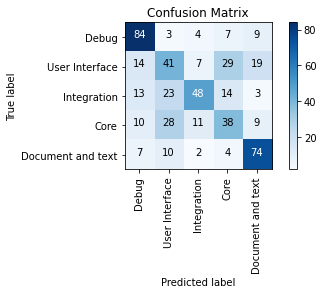

In [111]:

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [2]:
#import the dataset using the pandas

df_train = pd.read_excel('/home/charun/Documents/Projects/text_research/train_data.xlsx')

df_train.columns

Index(['Text', 'Label'], dtype='object')

In [4]:
df_test = pd.read_excel('/home/charun/Documents/Projects/text_research/test_data.xlsx')
df_test.columns

Index(['text', 'label'], dtype='object')

In [3]:
#convert our labels into numerical values. in here we add 0 for the User Interface, 1 for the debug and
# 2 for the document and text

df_train['Label'] = df_train['Label'].replace(['User Interface', 'Debug','Document and text', 'Integration', 'Core' ], [0,1,2,3,4])

#after that we drop the column which contains the textual labels

#new_df_train = df_train.drop(columns=['label'])
#new_df_train['Label'].unique()
new_df_train = df_train
#new_df_train = shuffle(new_df_train)

In [6]:
#convert our labels into numerical values. in here we add 0 for the User Interface, 1 for the debug and
# 2 for the document and text

df_test['label'] = df_test['label'].replace(['User Interface', 'Debug','Document and text', 'Integration', 'Core' ], [0,1,2,3,4])

#after that we drop the column which contains the textual labels

#new_df_test = df_test.drop(columns=['label'])
#new_df_test['Label'].unique()
new_df_test = df_test

,text,Label


In [4]:

#new_df['Text'] = ''.join([i for i in df['Text'][1] if not i.isdigit()])

new_df_train['Text'] = new_df_train['Text'].str.replace('\d+', ' ')
new_df_train['Text'] = new_df_train['Text'].apply(str)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [11]:
new_df_train['Text']

0       [formatter] New JavaDoc formatter wrongly inde...
1       An internal error occurred during: "Updating w...
2       [null][correlation] spurious "null pointer acc...
3       ASTRewrite should support replacing n nodes wi...
4       Unit tests and test framework mixed up over vm...
                              ...                        
3624    Cannot create build script anymore: NPE thrown...
3625       [p ] Support source.bundles.txt in p  installs
3626                                  Dead code in pde.ui
3627    Some bundleentry: iconURIs are not being rewri...
3628    [Schema][Editors] Update icons in Extension Po...
Name: Text, Length: 3629, dtype: object

In [26]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] large_grammars...... Large context-free and feature-based grammars
                           for parser comparison
  [ ] maxent_ne_chunker... ACE Named Entity Chunker (Maximum entropy)
  [ ] maxent_treebank_pos_tagger Treebank Part of Speech Tagger (Maximum entropy)
  [ ] mte_teip5........... MULTEXT-East 1984 annotated corpus 4.0
  [ ] mwa_ppdb............ The monolingual word aligner

    Error loading -: Package '-' not found in index



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?


KeyboardInterrupt: 

In [28]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/charun/snap/jupyter/6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

import nltk
nltk.download('punkt', 'stopwords')

# Preprocess the data

In [29]:
#preprocess the data
# in preprocessing we perform stopword removal, character removal, lemmatization etc

def form_sentence(sentence):
    sentence = re.sub(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", '', sentence)
    sentence = re.sub(r'<[^>]+>', '', sentence)
    sentence = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', sentence)
    sentence_blob = TextBlob(sentence)
    return ' '.join(sentence_blob.words)


def no_user_alpha(sentence):
    sentence_list = [ele for ele in sentence.split() if ele != 'user']
    clean_tokens = [t for t in sentence_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess


def normalization(sentence_list):
    lem = WordNetLemmatizer()
    normalized_tweet = []
    for word in sentence_list:
        normalized_text = lem.lemmatize(word, 'v')
        normalized_tweet.append(normalized_text)
    return normalized_tweet


Final_words_train = [] 
Final_words_test = []


for data in new_df_train['Text']:
    filtered = normalization(no_user_alpha(form_sentence(data)))
    word_Final = ' '.join(filtered)
    Final_words_train.append(word_Final)
    
#for data in new_df_test['text']:
#    filtered = normalization(no_user_alpha(form_sentence(data)))
#    word_Final = ' '.join(filtered)
#    Final_words_test.append(word_Final)


# store preprocessed data to new dataframe called final_bodyTrain    
    
final_bodyTrain = pd.DataFrame(Final_words_train, columns=['body'])
#final_bodyTest = pd.DataFrame(Final_words_test, columns=['body'])

In [31]:
final_bodyTrain['body'] = final_bodyTrain['body'].str.lower()
#final_bodyTest['body'] = final_bodyTest['body'].str.lower()

In [32]:
final_bodyTrain['body']

0       formatter new javadoc formatter wrongly indent...
1                 internal error occur updating workspace
2       null correlation spurious null pointer access ...
3       astrewrite support replace n nod nod better ma...
4       unit test test framework mix vmargs vs extravm...
                              ...                        
3624      create build script anymore npe throw operation
3625                                  p support p install
3626                                            dead code
3627        bundleentry iconuris rewrite durable platform
3628    schema editors update icons extension point el...
Name: body, Length: 3629, dtype: object

# include our filter method to identify the features

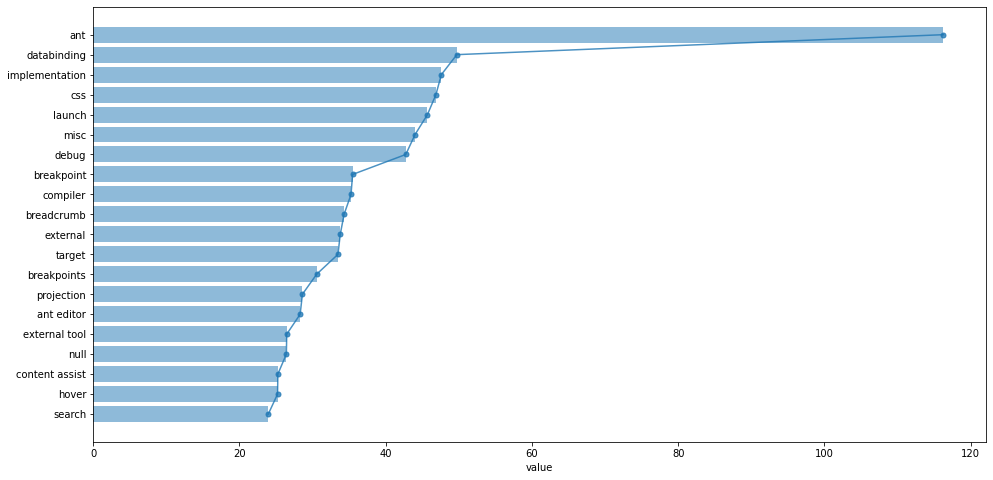

In [11]:
from sklearn.feature_selection import chi2
tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(final_bodyTrain.body)
y = new_df_train.Label
chi2score = chi2(X_tfidf, y)[0]


plt.figure(figsize=(16,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('value')
plt.show();

In [161]:
chi2

[('width', 0.006207398759425105),
 ('enter', 0.039844629724911845),
 ('get', 0.08103681558327643),
 ('still', 0.11545242134281025),
 ('function', 0.13087028852332036),
 ('sometimes', 0.13705097347429135),
 ('image', 0.15197626120820018),
 ('every', 0.189783810574423),
 ('location', 0.19301427201908347),
 ('second', 0.19646130057191727),
 ('client', 0.2090101901108877),
 ('internal', 0.21512866889994378),
 ('map', 0.22099162899596111),
 ('open editor', 0.2236924683214036),
 ('proxy', 0.2376914865588135),
 ('another', 0.2378929892802126),
 ('tab width', 0.24083285989673356),
 ('show', 0.2498704616655407),
 ('flash', 0.2551136698340644),
 ('honor', 0.2603381515291237),
 ('configure', 0.2706098232138787),
 ('declaration', 0.28401261050465565),
 ('give', 0.28849371342361707),
 ('better', 0.28926369725484247),
 ('things', 0.2946947226580651),
 ('context menus', 0.3037602435421218),
 ('pick', 0.3073282363462235),
 ('reuse', 0.3108124389824102),
 ('dispose', 0.3130623014983297),
 ('internal er

In [12]:
# we choose the features which have less than 0.5 score and then put it into a list called feature_list.
feature_set = []

for i in range(0, len(chi2)):
    if chi2[i][1] < 0.25:
        feature_set.append(chi2[i][0])
    

In [18]:
# feature_set

['without',
 'specify',
 'current',
 'duplicate',
 'change',
 'instead',
 'progress',
 'possible',
 'edit',
 'handle',
 'use',
 'bar',
 'dialog',
 'plugin',
 'slow',
 'error message',
 'due',
 'information',
 'preference',
 'add',
 'click',
 'rename',
 'first',
 'command',
 'context',
 'cancel',
 'reference',
 'one',
 'failure',
 'element',
 'test failures',
 'platform',
 'port',
 'clicking',
 'auto',
 'items',
 'exceptions',
 'state',
 'start',
 'provide',
 'format',
 'initialize',
 'still',
 'create',
 'secondary',
 'lose',
 'execution',
 'proposals',
 'character',
 'different',
 'failures due',
 'test failures due',
 'checkbox',
 'revert']

In [13]:
# then we remove the words of the feature_list from our original dataset. we replace those words with a space.
# so the words with less than 0.5 score are removed from the dataset
for data in final_bodyTrain['body']:
    for feature in feature_set:
        if feature in data:
            final_bodyTrain['body'] = final_bodyTrain['body'].replace(feature, ' ')

In [18]:
final_bodyTrain['body'].str.strip()

0       formatter new javadoc formatter wrongly indent...
1                 internal error occur updating workspace
2       null correlation spurious null pointer access ...
3       astrewrite support replace n nod nod better ma...
4       unit test test framework mix vmargs vs extravm...
                              ...                        
3624      create build script anymore npe throw operation
3625                                  p support p install
3626                                            dead code
3627        bundleentry iconuris rewrite durable platform
3628    schema editors update icons extension point el...
Name: body, Length: 3629, dtype: object

# create and train the model

In [6]:
# import all the libraries to train the model

import matplotlib.pyplot as plt
import time
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,roc_auc_score,roc_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Dropout
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from keras import optimizers
import pickle
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm
from keras.utils import to_categorical

In [33]:
token = Tokenizer()
token.fit_on_texts(final_bodyTrain['body'])

#integer encode the documents
seq = token.texts_to_sequences(final_bodyTrain['body'])

# pad the document

max_length = 100
pad_seq = pad_sequences(seq, maxlen=max_length, padding='post')

# testing set

#test_set = token.fit_on_texts(final_bodyTest['body'])

#integer encode the documents
#test_seq = token.texts_to_sequences(final_bodyTest['body'])

# pad the document

#max_length = 100
#testing_seq = pad_sequences(test_seq, maxlen=max_length, padding='post')




vocab_size = len(token.word_index) +1

#load the embedding layer

embedding_vector = {}

# we use the Glove to vectorize our dataset

f = open('/home/charun/Documents/Projects/text_research/glove.6B/glove.6B.100d.txt')
 
for line in tqdm(f):
  value = line.split(' ')
  word = value[0]
  coef = np.array(value[1:], dtype = 'float32')
  embedding_vector[word] = coef


# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word,i in tqdm(token.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

400000it [00:16, 23842.58it/s]
100%|██████████| 3058/3058 [00:00<00:00, 320710.67it/s]


In [34]:
y = new_df_train['Label']
y = np.array(y)
y = to_categorical(y)

#test_y = new_df_test['label']
#test_y = to_categorical(test_y)

In [23]:
y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [35]:


#define the model

model = Sequential()
model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], input_length=max_length, trainable=False))
#model.add(Bidirectional(LSTM(100)))
model.add(Bidirectional(LSTM(units=100, activation='relu'),input_shape=(1,100)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

callback = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.1, patience=10, verbose=0,
            mode='auto', min_delta=0.0001, cooldown=0, min_lr=0
            )


#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

adam = tf.keras.optimizers.Adam(
    learning_rate=0.001)

loss_fn = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True,
    label_smoothing=0,
    reduction="auto",
    name="categorical_crossentropy",
)

model.compile(
    optimizer = adam,
    loss = loss_fn,
    metrics = [tf.keras.metrics.BinaryAccuracy('accuracy'), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    #metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])


#train the model

history = model.fit(
    pad_seq, y, 
    batch_size = 128,
    epochs = 50,
    #validation_data = (testing_seq, test_y),
    validation_split = 0.3,
    
    callbacks = [callback]
)

#save the model

model.save('/home/charun/Documents/Projects/text_research/new_text_model2.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          305900    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1608      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 45        
Total params: 468,353
Trainable params: 162,453
Non-trainable params: 305,900
_________________________________________________________________
Epoch 1/50
20/20 [==============================] - 8s 274ms/step - loss: 1.6185 - accuracy: 0.8000 - precis

KeyboardInterrupt: 

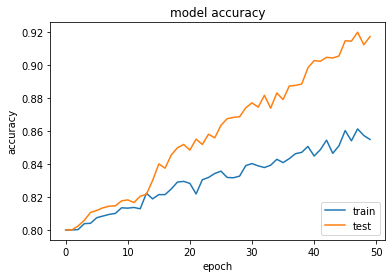

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()




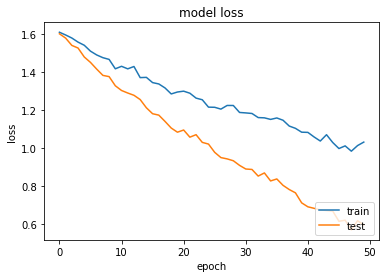

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

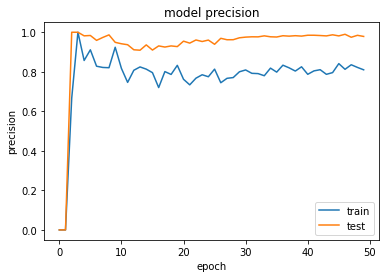

In [68]:
plt.plot(history.history['precision_4'])
plt.plot(history.history['val_precision_4'])

plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

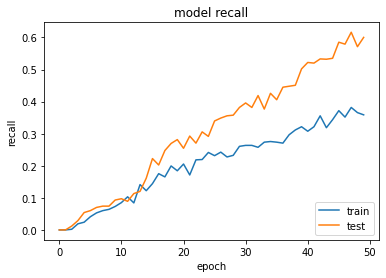

In [69]:
plt.plot(history.history['recall_3'])
plt.plot(history.history['val_recall_3'])

plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [20]:
import tensorflow

# import the trained model

model_path = '/home/charun/Documents/Projects/text_research/new_text_model2.h5'
model = tensorflow.keras.models.load_model(model_path)

In [72]:
df_eval = pd.read_excel('/home/charun/Documents/Projects/text_research/eval_data.xlsx')

In [73]:
df_eval.head(5)

,text,label
0,Install/Update pref Page; clean workspace diff...,Core
1,Remove warnings in latest build,Core
2,Ambiguous method invocation,Core
3,Compile warning in official build,Core
4,Dilip is learning bugzilla bug tracker,Core


In [34]:
#convert our labels into numerical values. in here we add 0 for the User Interface, 1 for the debug and
# 2 for the document and text

df_eval['Label'] = df_eval['label'].replace(['User Interface', 'Debug','Document and text', 'Integration', 'Core' ], [0,1,2,3,4])

#after that we drop the column which contains the textual labels

new_df_eval = df_eval.drop(columns=['label'])
new_df_eval['Label'].unique()

array([1, 0, 3, 4, 2])

In [35]:
# preprocess our evaluation dataset


def form_sentence(tweet):
    tweet = re.sub(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", '', tweet)
    tweet = re.sub(r'<[^>]+>', '', tweet)
    tweet = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', tweet)
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)


def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess


def normalization(tweet_list):
    lem = WordNetLemmatizer()
    normalized_tweet = []
    for word in tweet_list:
        normalized_text = lem.lemmatize(word, 'v')
        normalized_tweet.append(normalized_text)
    return normalized_tweet


Final_words_eval = [] 



for data in new_df_eval['text']:
    filtered = normalization(no_user_alpha(form_sentence(data)))
    word_Final = ' '.join(filtered)
    Final_words_eval.append(word_Final)
    


# store preprocessed data to new dataframe called final_bodyTrain    
    
final_body_eval = pd.DataFrame(Final_words_train, columns=['body'])


In [213]:
max_len = 130

model = tf.keras.models.load_model('/home/charun/Documents/Projects/text_research/model.h5')

In [220]:
txt = "Mark Occurrences should mark all declaration-equivalent types"


In [221]:
n_most_common_words = 8000
max_len = 100
#tokenizer = Tokenizer()
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
token.fit_on_texts([txt])

#integer encode the documents
seq = token.texts_to_sequences([txt])

# pad the document

max_length = 130
pad_seq = pad_sequences(seq, maxlen=max_length, padding='post')


In [222]:
seq

[[5, 20, 21, 5, 6, 22, 23, 24]]

In [223]:
pad_seq

array([[ 5, 20, 21,  5,  6, 22, 23, 24,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0]], dtype=int32)

In [225]:
#predict the result using the trained model

pred = model.predict(pad_seq)
pred

array([[0.39516103, 0.13412477, 0.16609646, 0.19263555, 0.11198226]],
      dtype=float32)

In [219]:
# get the label class

classes = np.argmax(pred, axis = 1)
print(classes)

[0]


In [62]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, f1_score,classification_report, accuracy_score
import itertools
import matplotlib.pyplot as plt

In [41]:
# f1 score
print(f1_score(new_df_eval['Label'], classes , average="macro"))


0.8552517546899242


In [74]:
print('accuracy for the evaluation dataset is {}'.format(accuracy_score(y_true=new_df_eval['Label'], y_pred=classes, normalize=True)))

accuracy for the evaluation dataset is 0.8547094188376754


In [67]:
target_names = ['User Interface', 'Debug','Document and text', 'Integration', 'Core']

In [68]:
print(classification_report(y_true=new_df_eval['Label'], y_pred=classes, target_names=target_names))

                   precision    recall  f1-score   support

   User Interface       0.76      0.79      0.78       195
            Debug       0.91      0.87      0.89       194
Document and text       0.93      0.95      0.94       204
      Integration       0.91      0.82      0.87       200
             Core       0.78      0.83      0.80       205

         accuracy                           0.85       998
        macro avg       0.86      0.85      0.86       998
     weighted avg       0.86      0.85      0.86       998



In [42]:
cm = confusion_matrix(y_true=new_df_eval['Label'], y_pred=classes)

In [56]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
# plotting the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


In [50]:
cm_plot_labels = ['User Interface', 'Debug','Document and text', 'Integration', 'Core']

Confusion matrix, without normalization
[[155   3   2   7  28]
 [ 11 169   0   5   9]
 [  4   1 194   3   2]
 [ 11   6   8 165  10]
 [ 23   6   5   1 170]]


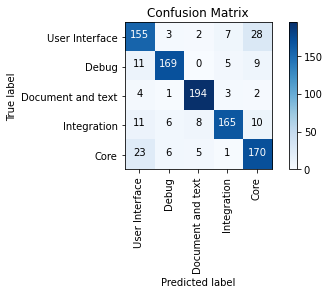

In [57]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')